* Import the dataset for data prepration and Exploration

In [2]:
import pandas as pd
# import the dataset
df = pd.read_excel('/content/AI ML Internship Training Data.xlsx')
df.head(5)

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


* There are Null values in column name 'Vehicle Type'

In [3]:
# get info about the dataset and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB


In [4]:
# get description about all colunm and their common trends
df.describe()

,Shipment Date,Planned Delivery Date,Actual Delivery Date,Distance (km)
count,20000,20000,20000,20000.000000
mean,2023-09-16 08:39:28.800000,2023-09-19 15:07:24.960000256,2023-09-21 13:34:45.120000,1101.663750
min,2023-01-01 00:00:00,2023-01-02 00:00:00,2023-01-02 00:00:00,200.000000
25%,2023-05-09 00:00:00,2023-05-13 00:00:00,2023-05-15 00:00:00,649.750000
50%,2023-09-16 00:00:00,2023-09-20 00:00:00,2023-09-21 00:00:00,1102.000000
75%,2024-01-25 00:00:00,2024-01-29 00:00:00,2024-01-31 00:00:00,1551.000000
max,2024-06-01 00:00:00,2024-06-08 00:00:00,2024-06-12 00:00:00,2000.000000
std,NaN,NaN,NaN,520.717873


* There are 597 Null values in vechile Type.

In [6]:
df.isnull().sum()

,0
Shipment ID,0
Origin,0
Destination,0
Shipment Date,0
Planned Delivery Date,0
Actual Delivery Date,0
Vehicle Type,597
Distance (km),0
Weather Conditions,0
Traffic Conditions,0


* explore each column and get distinct values in columns

In [7]:
# explore how many distinct values are there in each column
for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} distinct values")

Column 'Shipment ID': 20000 distinct values
Column 'Origin': 10 distinct values
Column 'Destination': 10 distinct values
Column 'Shipment Date': 518 distinct values
Column 'Planned Delivery Date': 524 distinct values
Column 'Actual Delivery Date': 528 distinct values
Column 'Vehicle Type': 4 distinct values
Column 'Distance (km)': 1801 distinct values
Column 'Weather Conditions': 4 distinct values
Column 'Traffic Conditions': 3 distinct values
Column 'Delayed': 2 distinct values


* Handle Null values by replacing it with mode of the 'vehicle type' column

In [3]:
# Fill missing values in 'Vehicle Type' with the most frequent value (mode)
most_frequent_vehicle_type = df['Vehicle Type'].mode()[0]
df['Vehicle Type'].fillna(most_frequent_vehicle_type, inplace=True)

# Verify that there are no missing values in 'Vehicle Type' anymore
df['Vehicle Type'].isnull().sum()


<ipython-input-3-e992914f9564>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle Type'].fillna(most_frequent_vehicle_type, inplace=True)


0

In [4]:
# again Check for Null values
df.isnull().sum()

,0
Shipment ID,0
Origin,0
Destination,0
Shipment Date,0
Planned Delivery Date,0
Actual Delivery Date,0
Vehicle Type,0
Distance (km),0
Weather Conditions,0
Traffic Conditions,0


* **Perform basic exploratory data analysis (EDA) to understand the data and identify useful features**

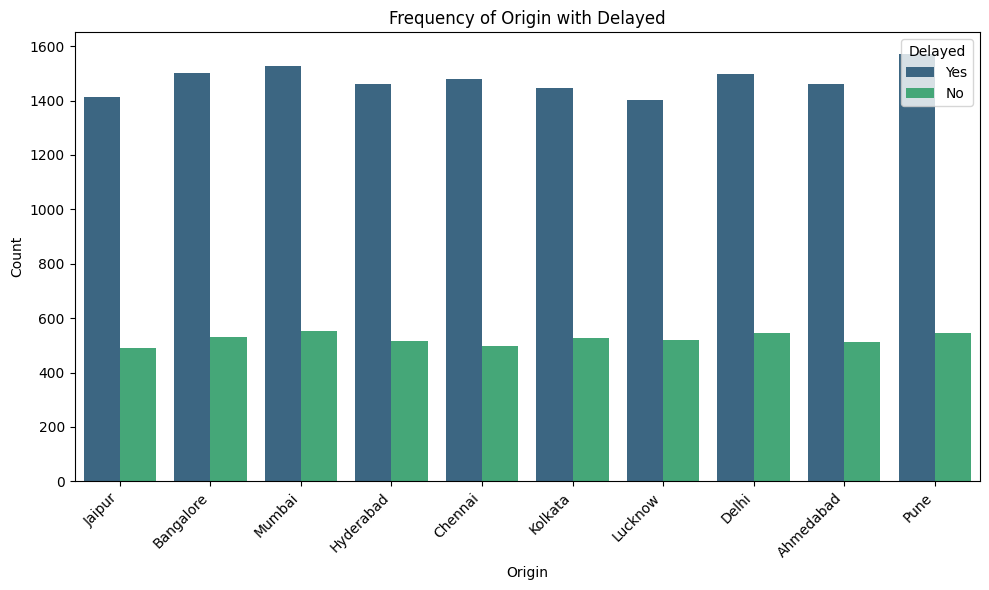

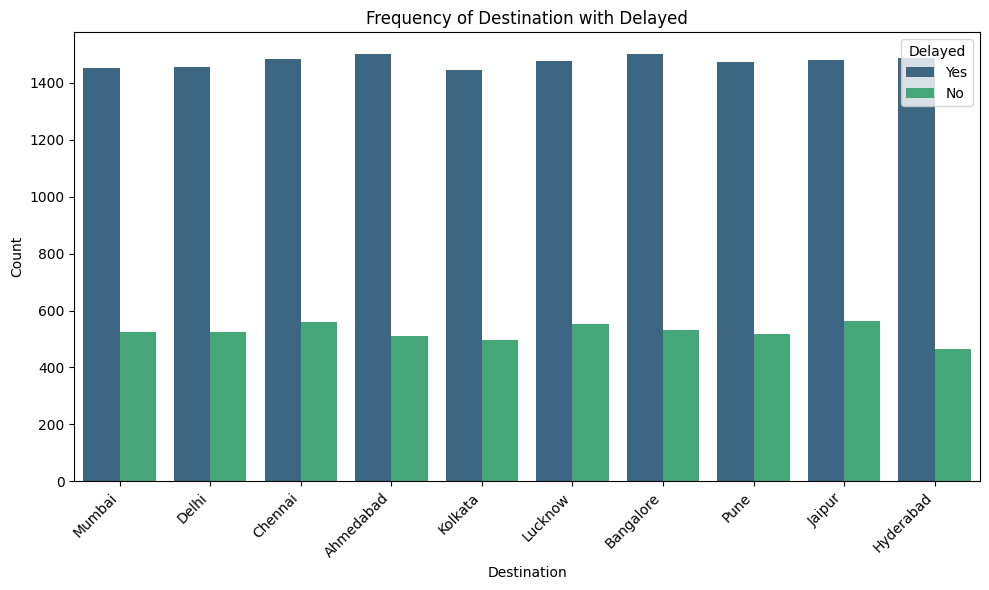

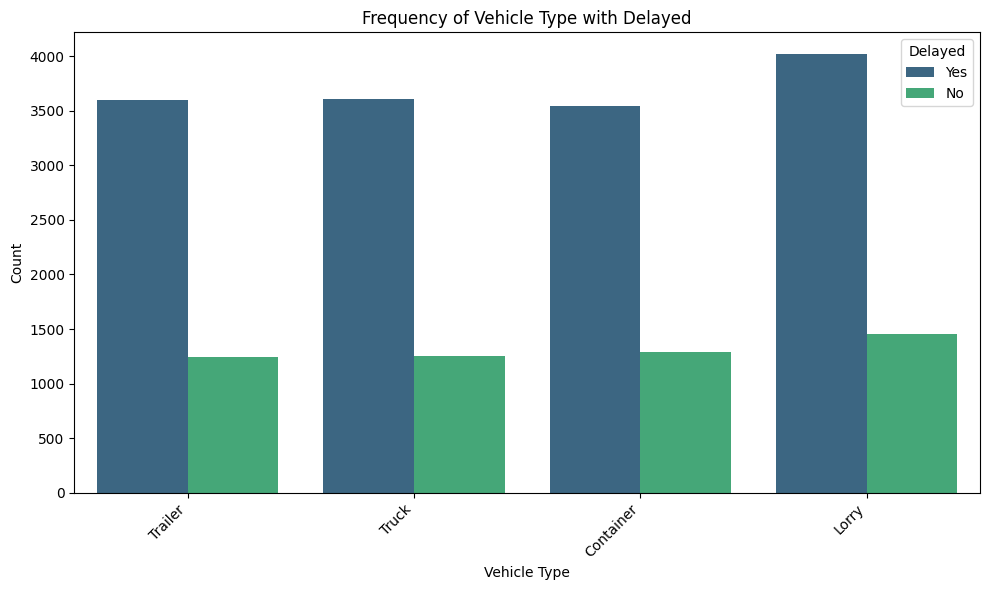

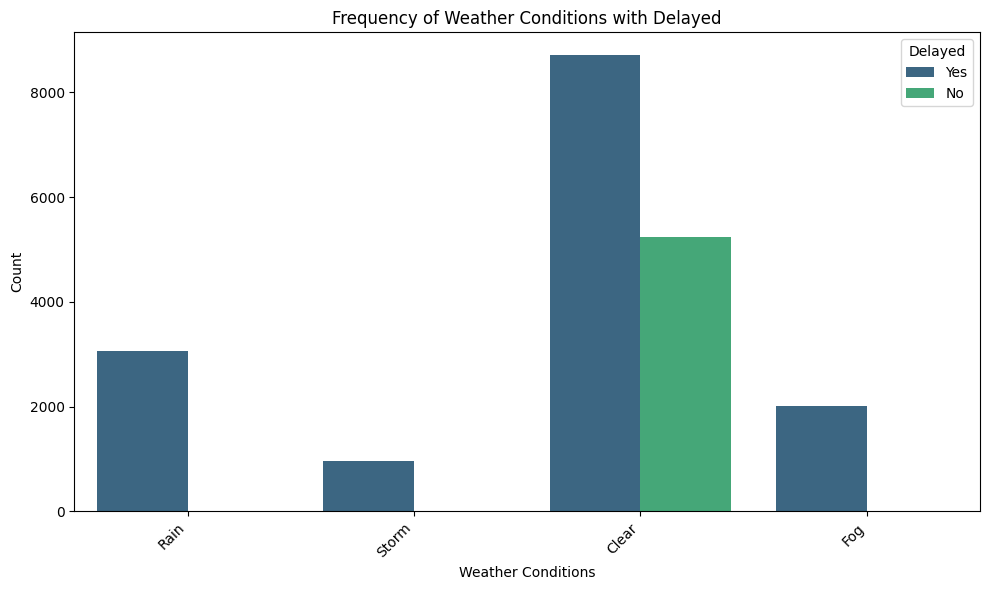

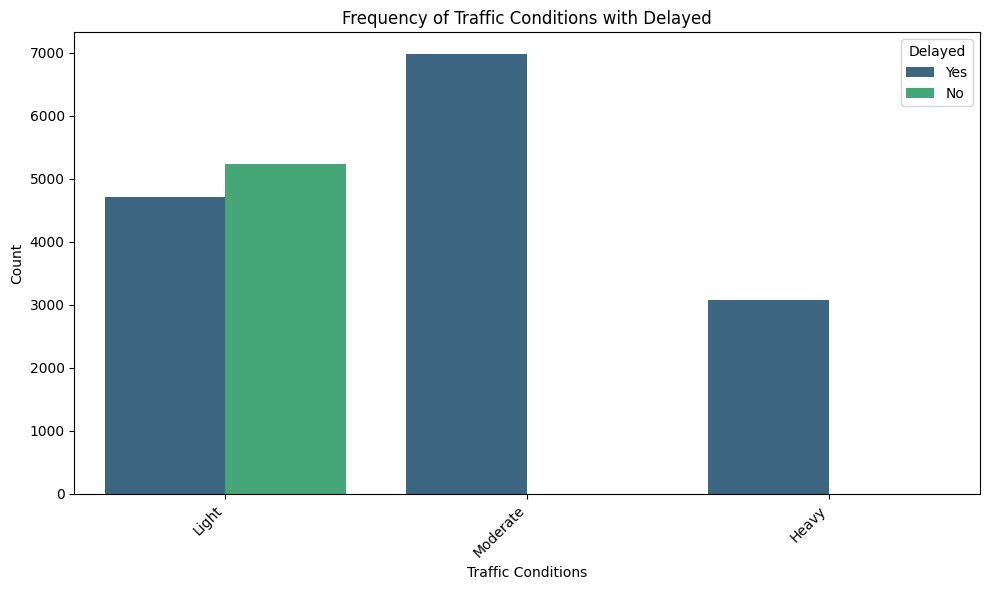

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualizations for categorical variables
categorical_columns = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions']

# Create frequency plots for each categorical variable with respect to 'Delayed'
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='Delayed', palette='viridis')
    plt.title(f"Frequency of {column} with Delayed")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Delayed')
    plt.tight_layout()
    plt.show()


* **Model Development**
using **Random forest **


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# Encode categorical columns
categorical_columns = ['Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Origin', 'Destination']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target variable 'Delayed' (Yes/No)
target_encoder = LabelEncoder()
df['Delayed'] = target_encoder.fit_transform(df['Delayed'])

# Define features (X) and target variable (y)
features = ['Distance (km)', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Origin', 'Destination']
X = df[features]
y = df['Delayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.84      0.79      1059
         Yes       0.94      0.89      0.92      2941

    accuracy                           0.88      4000
   macro avg       0.84      0.87      0.85      4000
weighted avg       0.89      0.88      0.88      4000



* Hyperparameter Tunning with different values of n_estimators, max_features, max_depth, min_samples_split and min_samples_leaf

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 110, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
y_pred = rf_random.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
138 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", 

{'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

          No       0.75      1.00      0.86      1059
         Yes       1.00      0.88      0.94      2941

    accuracy                           0.91      4000
   macro avg       0.87      0.94      0.90      4000
weighted avg       0.93      0.91      0.92      4000



*{'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

          No       0.75      1.00      0.86      1059
         Yes       1.00      0.88      0.94      2941

    accuracy                           0.91      4000
  
  These are the parameters where we get max accuracy and best f1-score


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

categorical_columns = ['Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Origin', 'Destination']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert the 'Delayed' column to string to ensure uniformity
df['Delayed'] = df['Delayed'].astype(str)

# Encode target variable 'Delayed' (Yes/No)
target_encoder = LabelEncoder()
df['Delayed'] = target_encoder.fit_transform(df['Delayed'])

# Define features (X) and target variable (y)
features = ['Distance (km)', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Origin', 'Destination']
X = df[features]
y = df['Delayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=10
)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
target_names = [str(cls) for cls in target_encoder.classes_]
classification_report_output = classification_report(y_test, y_pred, target_names=target_names)
# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

          No       0.75      1.00      0.86      1059
         Yes       1.00      0.88      0.94      2941

    accuracy                           0.91      4000
   macro avg       0.87      0.94      0.90      4000
weighted avg       0.93      0.91      0.92      4000



* Model Development using **Logistic Regression **

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression


categorical_columns = ['Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Origin', 'Destination']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert the 'Delayed' column to string to ensure uniformity
df['Delayed'] = df['Delayed'].astype(str)

# Encode target variable 'Delayed' (Yes/No)
target_encoder = LabelEncoder()
df['Delayed'] = target_encoder.fit_transform(df['Delayed'])

# Define features (X) and target variable (y)
features = ['Distance (km)', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Origin', 'Destination']
X = df[features]
y = df['Delayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 62.64999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* by using logistic model it can give maximumaccuracy of 63% which is less than the accuracy of random forest model

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score



# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up Logistic Regression and GridSearch for hyperparameter tuning
logreg = LogisticRegression(max_iter=500)
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with GridSearch
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

grid_search.best_params_, accuracy, report


({'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'},
 0.62675,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      1049\n           1       0.71      0.85      0.77      2951\n\n    accuracy                           0.63      4000\n   macro avg       0.35      0.42      0.39      4000\nweighted avg       0.52      0.63      0.57      4000\n')